In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

import keras
import keras.utils as utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential

import os
import matplotlib.pyplot as plt
import random


In [ ]:
IMG_SAVE_PATH = r'/Users/aaditmahajan/Documents/segregation_data'

Str_to_Int = {
    'normal'    :0,
    'cco'       :1,
    'mi_rs'     :2,
    'mi_ndj'    :3,
    'mi_pssc'   :4,
    'mii_pssc'  :5
}

NUM_CLASSES = 6

def Str_to_Int_mapper(val):
    return Str_to_Int[val]


In [ ]:
import cv2
import PIL

dataset = []

for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    if os.path.isdir(path) == True:
        for image in os.listdir(path):

            new_path = os.path.join(path, image)

            try:
                imgpath = PIL.Image.open(new_path)
                # print(imgpath)
                imgpath = imgpath.convert('RGB')
                img = np.asarray(imgpath)
                img = cv2.resize(img, (240, 240))
                img = img/255
                dataset.append([img, directory])
            except PIL.UnidentifiedImageError:
                print('error: skipped image')

data, labels = zip(*dataset)
temp = list(map(Str_to_Int_mapper, labels))
print(temp)
labels = keras.utils.to_categorical(temp)
# labels = tf.one_hot(labels, depth=2)
# print(labels)


In [ ]:
indices = random.sample(range(len(data)), 9)

images = np.array(data)[indices]
label = np.array(temp)[indices]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    # print(i)
    ax.imshow(images[i])
    # print(label[i])


    if label[i] == 0:
        ax.set_title('normal')
    elif label[i] == 1:
        ax.set_title('cco')
    elif label[i] == 2:
        ax.set_title('mi_rs')
    elif label[i] == 3:
        ax.set_title('mi_ndj')
    elif label[i] == 4:
        ax.set_title('mi_pssc')
    elif label[i] == 5:
        ax.set_title('mii_pssc')
    else:
        print('label error')
    ax.axis('off')
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import torch
import torchvision
import sys
import matplotlib.pyplot as plt


print(torch.__version__)
print(torchvision.__version__)
print(torch.cuda.is_available())

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x:x['area']), reverse=True)
    ax = plt.gca()
    # ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "/content/drive/MyDrive/documents/sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = 'cuda'
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

In [ ]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side = 12,
    pred_iou_thresh = 0.9,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    min_mask_region_area=1000,
    crop_n_points_downscale_factor=2
)

# mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
from glob import glob
from PIL import Image, ImageOps
import cv2

patch_paths = glob('/content/drive/MyDrive/2.png')
# remember to change patch_paths call to array call later

# for ii in range(len(patch_paths)):
ii = 0
image = cv2.imread(patch_paths[ii])
masks = mask_generator.generate(image)
print(ii, patch_paths[ii])
print('No of detected cells = ', len(masks))
plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.axis('off')
plt.subplot(122)
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()




In [ ]:
import cv2

image = cv2.imread('/content/drive/MyDrive/2.png')


# blurred = cv2.GaussianBlur(image, (5, 5), 0)
# plt.imshow(blurred)
# plt.show()

# hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# result = image.copy()
# lower1 = np.array([0, 100, 20])
# upper1 = np.array([10, 255, 255])

# lower2 = np.array([160,100,20])
# upper2 = np.array([179,255,255])

# lower_mask = cv2.inRange(hsv, lower1, upper1)
# upper_mask = cv2.inRange(hsv, lower2, upper2)

# full_mask = lower_mask + upper_mask

# result_blue = cv2.bitwise_and(result, result, mask = full_mask)

# plt.imshow(full_mask, cmap = 'gray')
# plt.show()
# plt.imshow(result_blue, cmap = 'gray')
# plt.show()

In [ ]:
# lower_blue = np.array([100, 100, 20])
# upper_blue = np.array([140, 255, 255])

# mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# result_red = cv2.bitwise_and(image, image, mask = mask_blue)
# spores = result_red + result_blue

# plt.imshow(image, cmap = 'gray')
# plt.show()
# plt.imshow(result_red, cmap = 'gray')
# plt.show()

# plt.imshow(spores, cmap='gray')
# plt.show()

# spores = cv2.dilate(spores, kernel=cv2.getStructuringElement(cv2.MORPH_DILATE, (5,5)), iterations=1)
# plt.imshow(spores)
# plt.show()

In [ ]:
# cell = spores
# plt.imshow(cell)
# plt.show()
# sobelxc = cv2.Sobel(cell,cv2.CV_64F,1,0,ksize=5)
# sobelyc = cv2.Sobel(cell,cv2.CV_64F,0,1,ksize=5)
# cell = sobelxc + sobelyc

edges = cv2.Canny(image,500,50)
# edges = cv2.erode(edges, kernel = cv2.getStructuringElement(cv2.MORPH_ERODE, (3, 3)), iterations=1)

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
edges_3d_array = np.zeros((1080, 1080, 3))
for i in range(3):
  edges_3d_array[:, :, i] = edges

edges_3d_array = cv2.GaussianBlur(edges_3d_array, (3, 3), 0)
plt.imshow(edges_3d_array)

plt.show()

In [ ]:
# import pyclesperanto_prototype as cle
from skimage.io import imshow
# cle.select_device('cupy')

# binarized = cle.threshold_otsu(cv2.cvtColor(spores, cv2.COLOR_BGR2GRAY))
# imshow(binarized)
# binary_blur = cle.gaussian_blur(binarized, sigma_x=0.72, sigma_y=0.72, sigma_z=0.72)
#labels = cle.connected_components_labeling_box(binary_blur)
#labels
masks2 = mask_generator.generate(np.asarray(edges_3d_array, dtype='uint8'))
print('No of detected cells = ', len(masks2))
plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.axis('off')
plt.subplot(122)
plt.imshow(edges_3d_array)
show_anns(masks2)
plt.axis('off')
plt.show()


In [ ]:
cropped_rois = []
individual_cells = []
clusters = []
for i in range(len(masks2)):
    x=int(masks2[i]['bbox'][0])
    y=int(masks2[i]['bbox'][1])
    a=int(masks2[i]['bbox'][2])
    b=int(masks2[i]['bbox'][3])
    cropped_im = image[y:y+b, x:x+a, :]
    cropped_rois.append(cropped_im)
    cropped_mask = masks2[i]['segmentation'][y:y+b, x:x+a]
    plt.figure(figsize=(4,3))
    plt.subplot(121)
    plt.imshow(cropped_im)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(cropped_mask)
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(4,4))
    plt.imshow(masks2[i]['segmentation'])
    plt.axis('off')
    plt.show()
    print("---")
    print("image no. ", str(i))
    print("Area: ", masks2[i]['area'])
    print("predicted_iou: ", masks2[i]['predicted_iou'])
    print("stability_score: ", masks2[i]['stability_score'])
    print("-----------------------------------------------------------------")
    area = masks2[i]['area']
    if area in range(2000, 3000):
      individual_cells.append(cropped_im)
    elif area > 3000:
      clusters.append(cropped_im)
    else:
      continue

In [ ]:
for cluster in clusters:
  plt.imshow(cluster)
  plt.show()

In [ ]:
ind_cell_mask_gen = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side = 7,
    pred_iou_thresh = 0.8,
    stability_score_thresh=0.8,
    crop_n_layers=1,
    min_mask_region_area=4000,
    crop_n_points_downscale_factor=2
)

for cluster in clusters:

  mask_cluster = ind_cell_mask_gen.generate(np.asarray(cluster, dtype='uint8'))
  print('no of detected cells in cluster = ', len(mask_cluster))
  plt.imshow(cluster)
  show_anns(mask_cluster)
  plt.show()
  for j in range(len(mask_cluster)):
    x=int(mask_cluster[j]['bbox'][0])
    y=int(mask_cluster[j]['bbox'][1])
    a=int(mask_cluster[j]['bbox'][2])
    b=int(mask_cluster[j]['bbox'][3])
    cropped_im = cluster[y:y+b, x:x+a, :]
    area = mask_cluster[j]['area']
    if area in range(1500, 3000):
      individual_cells.append(cropped_im)
      print('added to individual cells array....')
      plt.imshow(cropped_im)
      plt.show()

# for roi in cropped_rois:

#   masks_ind = ind_cell_mask_gen.generate(np.asarray(roi, dtype='uint8'))
#   print('No of detected cells = ', len(masks_ind))
#   mask_index_delete = []
#   if len(masks_ind) == 1:
#     individual_cells.append(roi)

#   else:
#     # find masks that are spore sized and neglect them
#     for i in range(len(masks_ind)):
#       if masks_ind[i]['area'] < 500:
#         mask_index_delete.append(i)
#       else:
#         x=int(masks_ind[i]['bbox'][0])
#         y=int(masks_ind[i]['bbox'][1])
#         a=int(masks_ind[i]['bbox'][2])
#         b=int(masks_ind[i]['bbox'][3])
#         cropped_im = image[y:y+b, x:x+a, :]
#         clusters.append(cropped_im)

  # plt.figure(figsize=(8, 5))
  # plt.subplot(121)
  # plt.axis('off')
  # plt.subplot(122)








In [ ]:
for image in individual_cells:
  plt.imshow(image)
  plt.show()

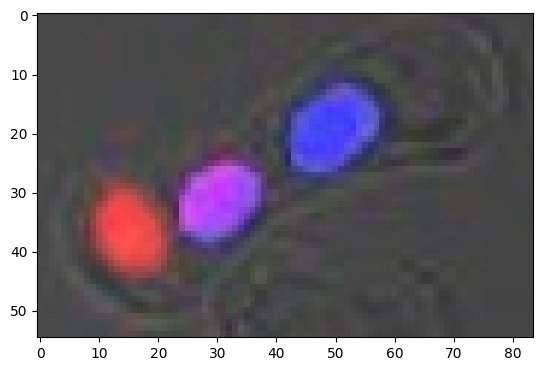

In [28]:
import os
import cv2
import PIL
import matplotlib.pyplot as plt
import numpy as np
import imutils
image = cv2.imread('/Users/aaditmahajan/Documents/segregation_data/mi_pssc/0316-0525.png')
plt.imshow(image)

plt.show()

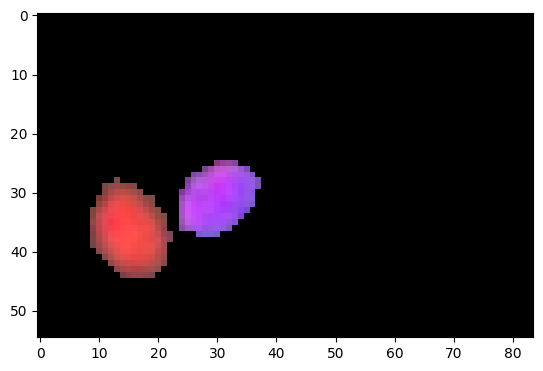

In [30]:
result = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_blue = np.array([120, 0, 20])
upper_blue = np.array([255, 255, 255])
mask_blue = cv2.inRange(image, lower_blue, upper_blue)
result_red = cv2.bitwise_and(image, image, mask = mask_blue)

plt.imshow(result_red)
plt.show()



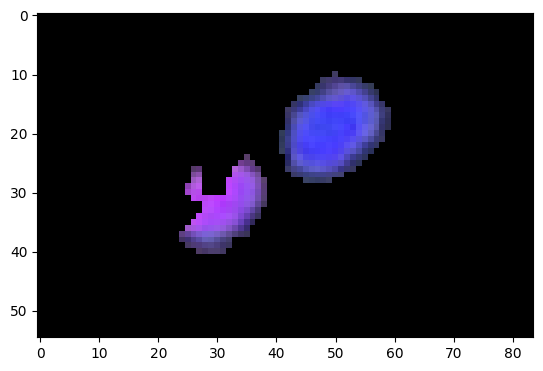

In [31]:
lower1 = np.array([0, 100, 20])
upper1 = np.array([10, 255, 255])

lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])

lower_mask = cv2.inRange(hsv, lower1, upper1)
upper_mask = cv2.inRange(hsv, lower2, upper2)

full_mask = lower_mask + upper_mask

result_blue = cv2.bitwise_and(result, result, mask = full_mask)
plt.imshow(result_blue)
plt.show()


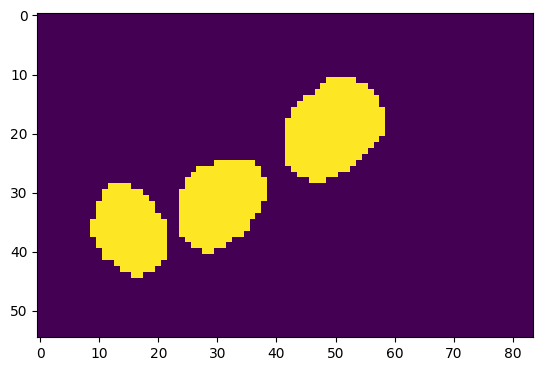

In [32]:
spores = result_red + result_blue

spgray = cv2.cvtColor(spores, cv2.COLOR_BGR2GRAY)

blursp = cv2.GaussianBlur(spgray, (5, 5), 0)
ret, thresh = cv2.threshold(blursp, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh)
plt.show()

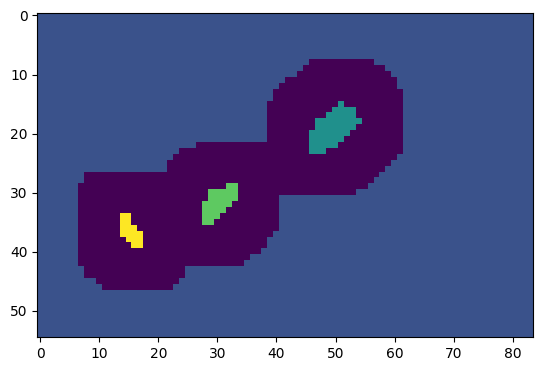

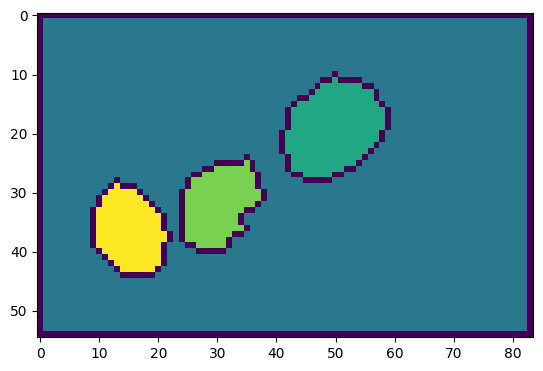

In [33]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.show()

markers = cv2.watershed(spores,markers)
spores[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

1. raw image input
2. process for isolating different colored spores
3. keep one grayscale background 
4. find centers of each different spore positions in:
    a. red 
    b. blue
    c. pink
    d. blank (from the background)

In [34]:
def red_spores(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    res = image.copy()
    lower_blue = np.array([120, 0, 20])
    upper_blue = np.array([255, 255, 255])
    mask_blue = cv2.inRange(image, lower_blue, upper_blue)
    res = cv2.bitwise_and(image, image, mask = mask_blue)
    return res

def blue_spores(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower1 = np.array([0, 100, 20])
    upper1 = np.array([10, 255, 255])

    lower2 = np.array([160,100,20])
    upper2 = np.array([179,255,255])

    lower_mask = cv2.inRange(hsv, lower1, upper1)
    upper_mask = cv2.inRange(hsv, lower2, upper2)

    full_mask = lower_mask + upper_mask

    res = cv2.bitwise_and(result, result, mask = full_mask)
    return res

def pink_spores(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_pink = np.array([140, 0, 255])
    upper_pink = np.array([160, 255, 255])
    mask_pink = cv2.inRange(image, lower_pink, upper_pink)
    res = cv2.bitwise_and(image, image, mask = mask_pink)
    return res


In [18]:
def find_centers(image):
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	blur = cv2.GaussianBlur(gray, (5, 5), 0)
	ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

	plt.imshow(thresh)
	plt.title('threshold image')
	plt.show()

	kernel = np.ones((3,3),np.uint8)
	opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
	# sure background area
	sure_bg = cv2.dilate(opening,kernel,iterations=3)
	# Finding sure foreground area
	dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
	ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
	# Finding unknown region
	sure_fg = np.uint8(sure_fg)
	unknown = cv2.subtract(sure_bg,sure_fg)
	ret, markers = cv2.connectedComponents(sure_fg)
	# Add one to all labels so that sure background is not 0, but 1
	markers = markers+1
	# Now, mark the region of unknown with zero
	markers[unknown==255] = 0

	plt.imshow(markers)
	plt.show()

	markers = cv2.watershed(spores,markers)
	spores[markers == -1] = [255,0,0]

	plt.imshow(markers)
	plt.title('masks from watershed segmentation')
	plt.show()
	
	center_coords = []
	for marker in np.unique(markers):
		if marker == 0:
			continue
		# otherwise, allocate memory for the label region and draw
		# it on the mask
		mask = np.zeros(spgray.shape, dtype="uint8")
		mask[markers == marker] = 255
		# detect contours in the mask and grab the largest one
		cntrs = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
			cv2.CHAIN_APPROX_SIMPLE)
		cntrs = imutils.grab_contours(cntrs)
		c = max(cntrs, key=cv2.contourArea)
		# draw a circle enclosing the object
		((x, y), r) = cv2.minEnclosingCircle(c)
		cv2.circle(spores, (int(x), int(y)), int(r), (0, 255, 0), 2)
		# cv2.putText(spores, "#{}".format(marker), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
		center_coords.append((x, y))
	
	center_coords = np.unique(center_coords)
	return center_coords


# plt.imshow(spores)
# plt.show()



find spore centers 

the catch is to isolate blank positions cell centers

either use the fact that theres one less entry in the center_coords array 
or try to find the spore positions in grayscale of the complete image with background 
and then try to eliminate the existing spore centers by having a buffer around the centers 
returned by the find_centers function. 




In [29]:
spores_red = red_spores(image)
spores_blue = blue_spores(image)
spores_pink = pink_spores(image)

plt.subplot(1, 3, 1)
plt.imshow(spores_red)
plt.title('Red Spores')
plt.subplot(1, 3, 2)
plt.imshow(spores_blue)
plt.title('Blue Spores')
plt.subplot(1, 3, 3)
plt.imshow(spores_pink)
plt.title('Pink Spores')
plt.show()


# red_centers = find_centers(spores_red)
# blue_centers = find_centers(spores_blue)
# pink_centers = find_centers(spores_pink)



error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


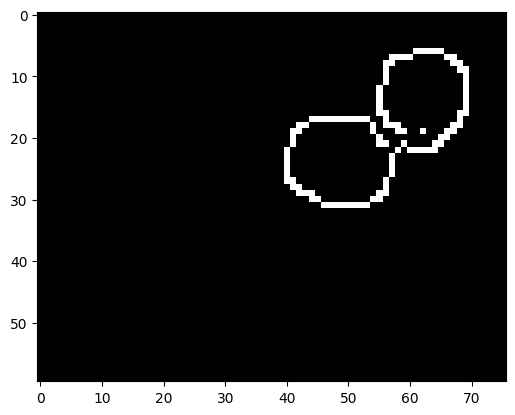

In [ ]:
blur = cv2.bilateralFilter(result_blue,9,75,75)
blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
sv = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
sh = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
sobel = sv + sh
# plt.imshow(sobel)
# plt.show()

temp = np.uint8(result_red)
spore_edges = cv2.Canny(temp, 265, 20)
plt.imshow(spore_edges, cmap='gray')
plt.show()


In [ ]:
output = spore_edges.copy()

red_circles = cv2.HoughCircles(spore_edges, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2=30, minRadius=0, maxRadius=50)
if red_circles is not None:
    red_circles = np.round(red_circles[0, :]).astype("int")
    for (x, y, r) in red_circles:
        cv2.circle(output, (x, y), 0, (0, 255, 0), 4)

    plt.imshow(output)
    plt.show()